# Classifying

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model = load_model('latest_model_BC_Resnet.keras', compile=False)

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 14840 images belonging to 5 classes.


In [4]:
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes
class_name = list(test_generator.class_indices.keys())

C:\Users\Diksha\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


464/464 ━━━━━━━━━━━━━━━━━━━━ 325s 698ms/step



 Overall Accuracy: 0.6009

 Classification report:
                             precision    recall  f1-score   support

      airport_image_logmel       0.52      0.48      0.50      2960
          bus_image_logmel       0.64      0.66      0.65      2970
        metro_image_logmel       0.56      0.54      0.55      2970
         park_image_logmel       0.91      0.64      0.75      2970
shopping_mall_image_logmel       0.50      0.68      0.57      2970

                  accuracy                           0.60     14840
                 macro avg       0.63      0.60      0.61     14840
              weighted avg       0.63      0.60      0.61     14840



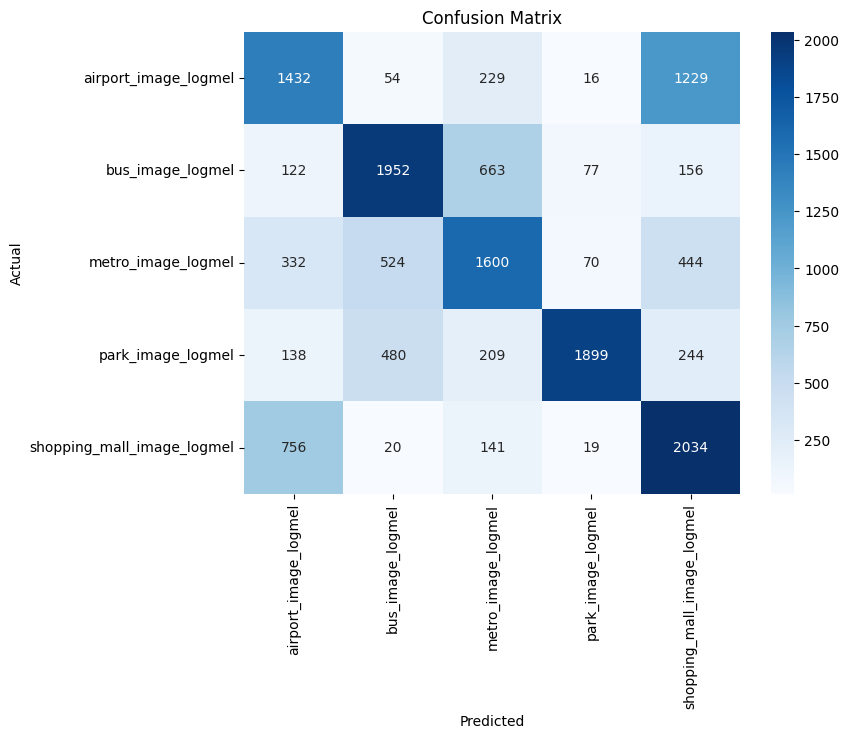

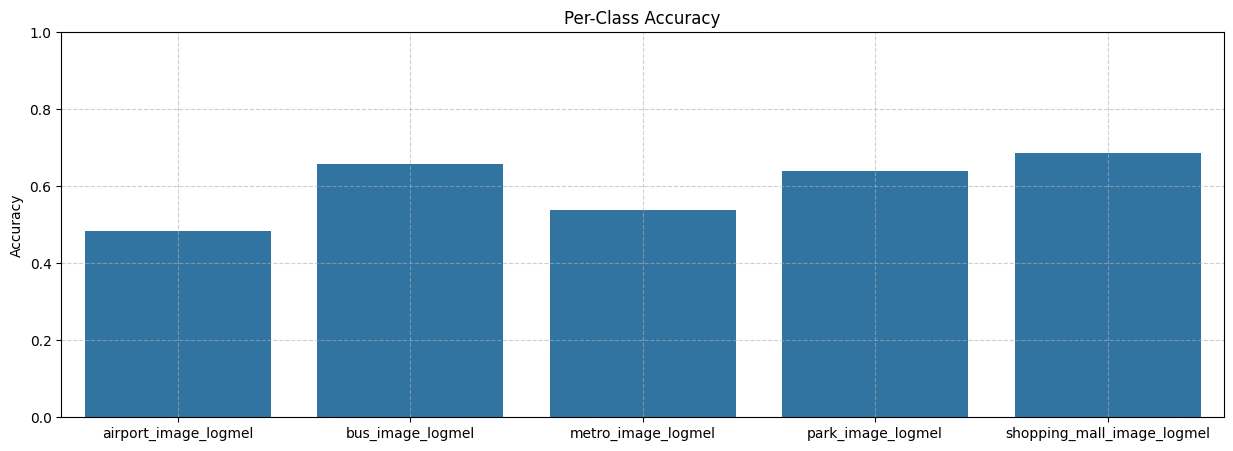

In [8]:
acc = accuracy_score(y_true, y_pred)
print(f"\n Overall Accuracy: {acc:.4f}")

report = classification_report(y_true, y_pred, target_names = class_name)
print("\n Classification report:\n", report)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels = class_name, yticklabels=class_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Per-Class Accuracy
per_class_acc = cm.diagonal() / cm.sum(axis=1)

# Bar Chart for Per-Class Accuracy
plt.figure(figsize=(15, 5))
sns.barplot(x=class_name, y=per_class_acc)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()